In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#from _future_ import printfunction,unicode literals
import json
import requests
import xlrd
import openpyxl

In [3]:
RANDOM_SEED = 20090425

In [30]:
bj_AQI=pd.read_csv("data/BeiJing_AQI.csv")
bj_AQI

,Date,AQI,PM2.5,PM10,SO2,CO,NO2,O3,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,2015/2/1,102,77,98,41,1.9,67.0,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015/2/2,185,139,156,57,2.5,87.0,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015/2/3,153,117,79,29,1.9,61.0,69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015/2/4,36,10,32,9,0.4,20.0,71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015/2/5,39,27,35,16,0.7,42.0,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1575,2019/5/27,48,优,6,15,3.0,0.2,14,96.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1576,2019/5/28,80,良,12,36,3.0,0.3,32,135.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1577,2019/5/29,144,轻度污染,21,51,3.0,0.4,33,208.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1578,2019/5/30,61,良,20,54,4.0,0.3,24,113.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
bj_AQI=pd.read_csv("AQI_for_the_ten_cities/BeiJing_AQI.csv")
bj_AQI = bj_AQI.iloc[:,:2]
bj_AQI

,Date,AQI
0,2015/2/1,102
1,2015/2/2,185
2,2015/2/3,153
3,2015/2/4,36
4,2015/2/5,39
...,...,...
1575,2019/5/27,48
1576,2019/5/28,80
1577,2019/5/29,144
1578,2019/5/30,61


In [32]:
bj_AQI=pd.read_csv("data/BeiJing_AQI.csv")
bj_AQI = bj_AQI.iloc[:,:2]
bj_AQI_data = bj_AQI.iloc[:,1:]
bj_AQI_data

,AQI
0,102
1,185
2,153
3,36
4,39
...,...
1575,48
1576,80
1577,144
1578,61


In [33]:
bj_AQI_data_mean = bj_AQI_data.mean()
bj_AQI_data_mean

AQI    104.710127
dtype: float64

In [34]:
bj_AQI_data_var = bj_AQI_data.var()
bj_AQI_data_var

AQI    4416.188244
dtype: float64

bj_senti = bj_senti.set_index('time')
bj_senti.head(50)

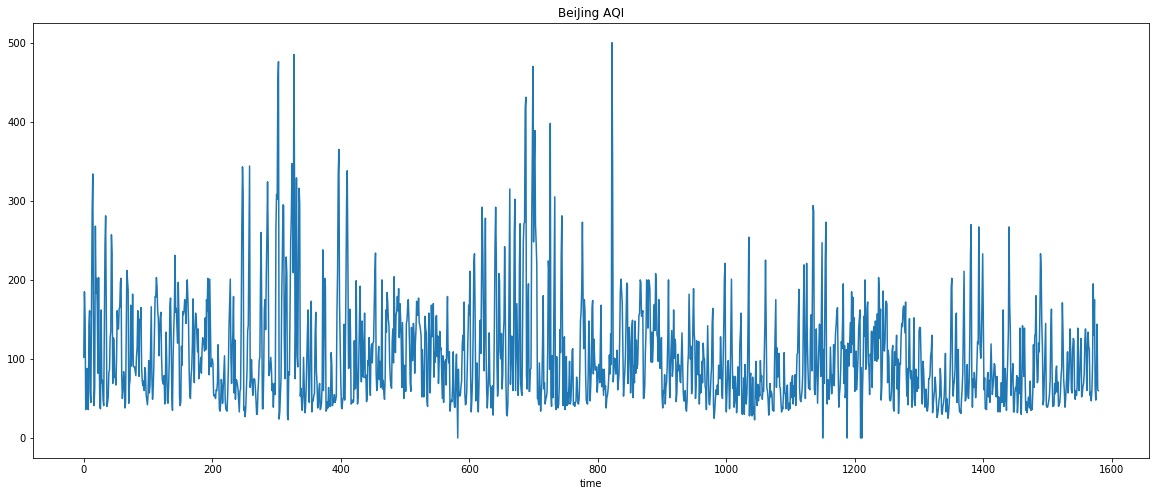

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,8))
plt.plot(bj_AQI_data.AQI)
plt.title('BeiJing AQI')
# plt.ylabel('')
plt.xlabel('time')
plt.grid(False)
plt.show()

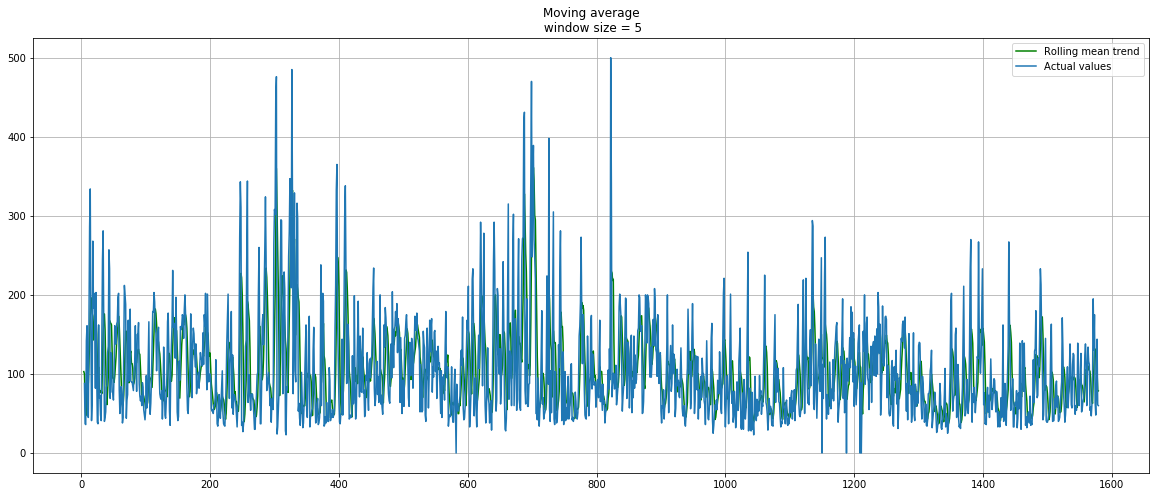

In [36]:
def plot_moving_average(series,window,plot_intervals=False, scale =1.96):
    rolling_mean = series.rolling(window=window).mean()
 
    plt.figure(figsize=(20,8))
    plt.title('Moving average\n window size = {}'.format(window))
    #smaller window, more details; more bigger window, you can see the plot
    plt.plot(rolling_mean, 'g', label='Rolling mean trend')
    #plt.plot(lwd = 1)

    #Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')

    plt.plot(series[window:], label='Actual values')
    plt.legend(loc='best')
    plt.grid(True)

#Smooth by the previous 5 days (by week)
plot_moving_average(bj_AQI_data.AQI, 5)

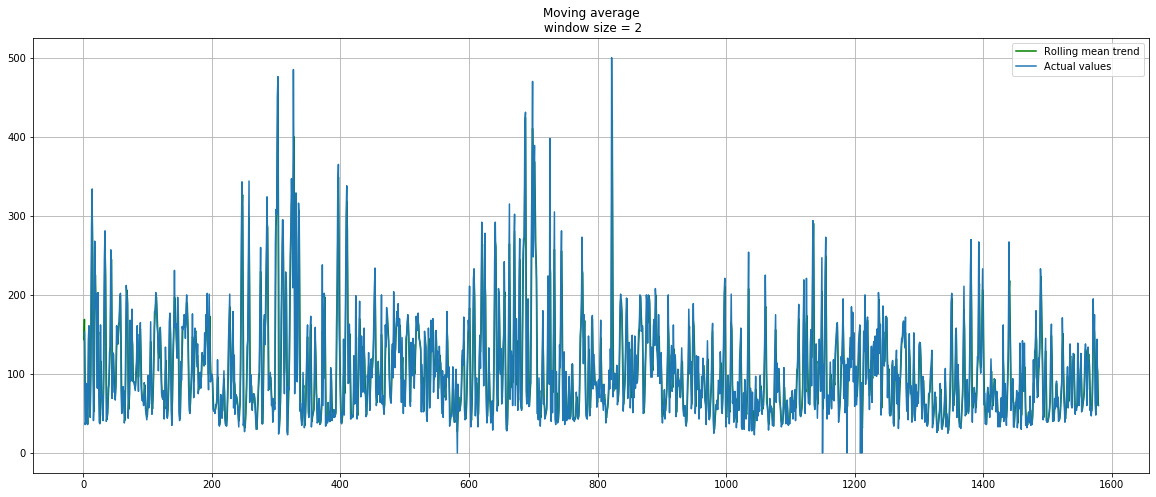

In [37]:
plot_moving_average(bj_AQI_data.AQI, 2)

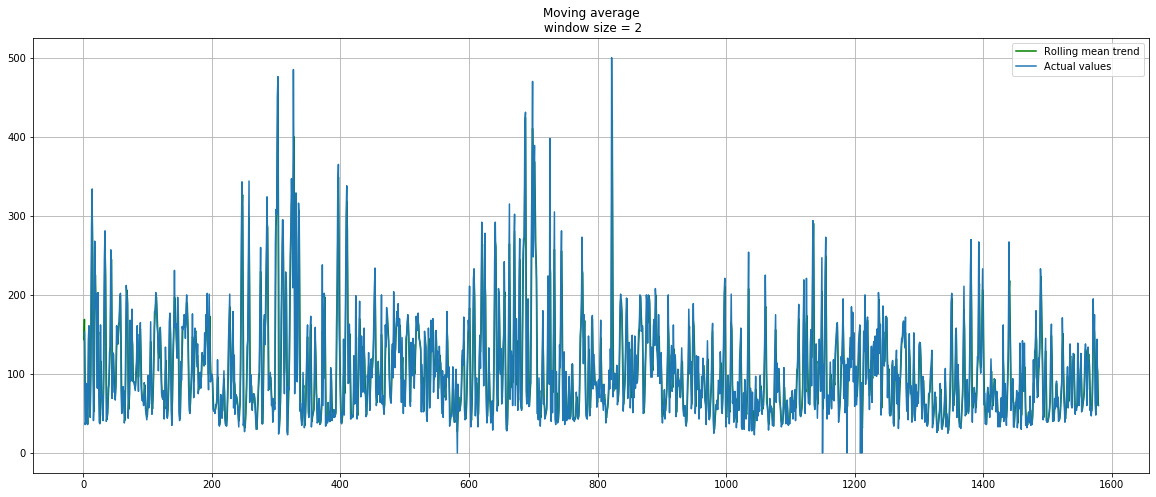

In [38]:
plot_moving_average(bj_AQI_data.AQI, 2, plot_intervals=False)

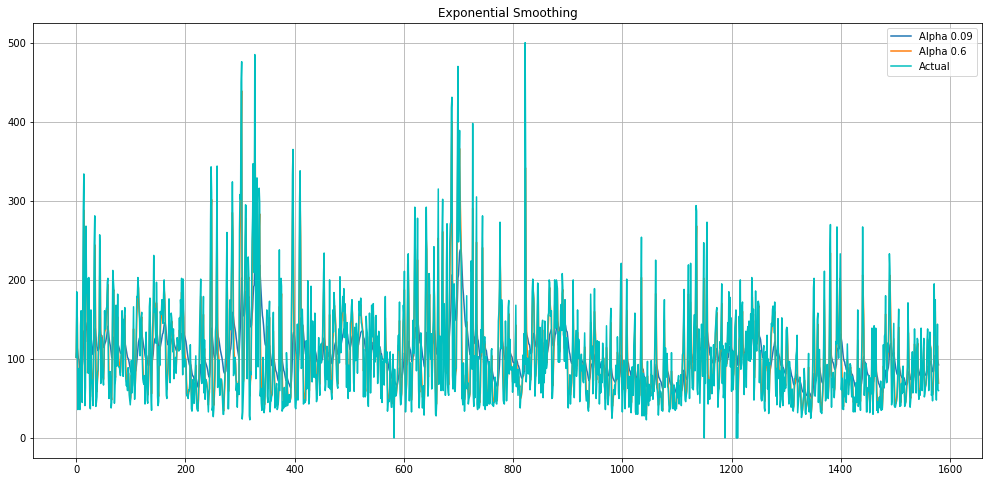

In [39]:
def exponential_smoothing(series, alpha):
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

def plot_exponential_smoothing(series, alphas):
    plt.figure(figsize=(17, 8))
    for alpha in alphas:
        plt.plot(exponential_smoothing(series, alpha), label="Alpha {}".format(alpha))
    plt.plot(series.values, "c", label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Exponential Smoothing")
    plt.grid(True);
        
plot_exponential_smoothing(bj_AQI_data.AQI, [0.09, 0.6])

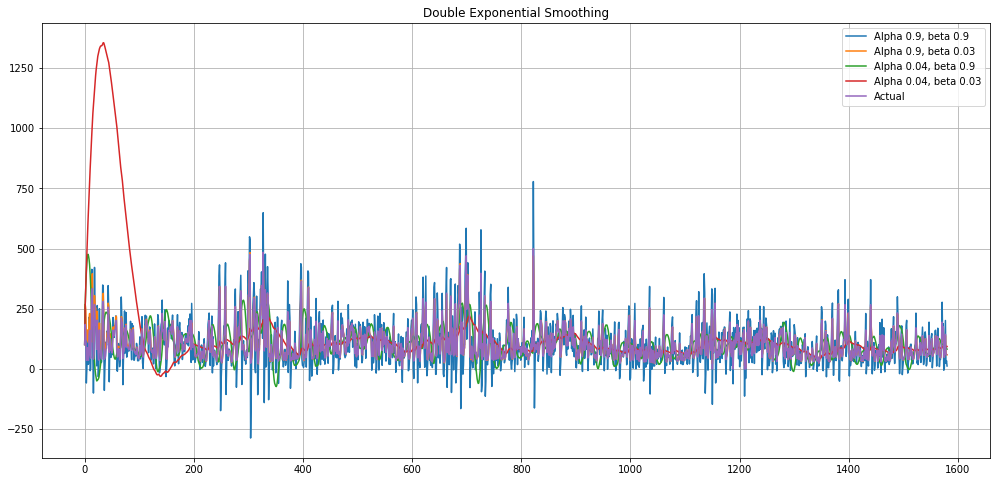

In [40]:
def double_exponential_smoothing(series, alpha, beta):
    result = [series[0]]
    
    for n in range(1, len(series)+1):
        if n == 1:
            level, trend = series[0], series[1] - series[0]
        if n >= len(series): # forecasting
            value = result[-1]
        else:
            value = series[n]
        
        last_level, level = level, alpha * value + (1 - alpha) * (level + trend)
        trend = beta * (level - last_level) + (1 - beta) * trend
        result.append(level + trend)
    return result

def plot_double_exponential_smoothing(series, alphas, betas):
    plt.figure(figsize=(17, 8))
    for alpha in alphas:
        for beta in betas:
            plt.plot(double_exponential_smoothing(series, alpha, beta), label="Alpha {}, beta {}".format(alpha, beta))
    plt.plot(series.values, label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Double Exponential Smoothing")
    plt.grid(True)

plot_double_exponential_smoothing(bj_AQI_data.AQI, alphas=[0.9, 0.04], betas=[0.9, 0.03])

In [41]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [42]:
# Some functions to help out with
def plot_predictions(test,predicted):
    plt.figure(figsize=(24, 8))
    plt.plot(test, color='red',label='Real Positive Value')
    plt.plot(predicted, color='blue',label='Predicted Positive Value')
    plt.title('Positive Value Prediction')
    plt.xlabel('Time')
    plt.ylabel('Positive Value')
    plt.legend()
    plt.show()

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))


In [43]:
bj_AQI_data

,AQI
0,102
1,185
2,153
3,36
4,39
...,...
1575,48
1576,80
1577,144
1578,61


In [44]:
# First, we get the data
dataset = bj_AQI_data
dataset

,AQI
0,102
1,185
2,153
3,36
4,39
...,...
1575,48
1576,80
1577,144
1578,61


In [81]:
# Checking for missing values
training_set = dataset[:1200].values
test_set = dataset[1200:].values
training_set.shape

(1200, 1)

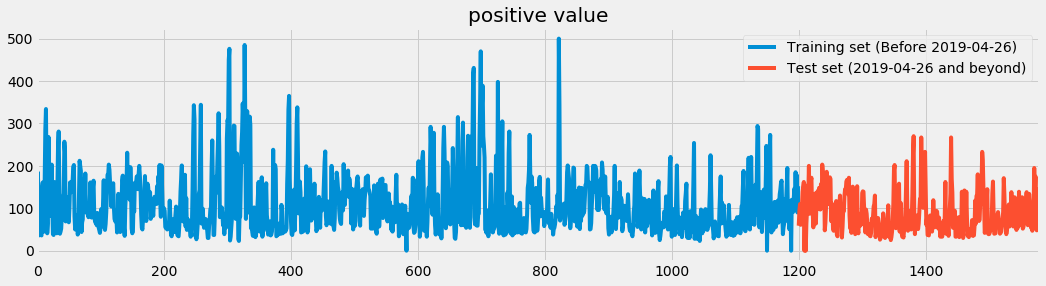

In [49]:
dataset["AQI"][:1200].plot(figsize=(16,4),legend=True)
dataset["AQI"][1200:].plot(figsize=(16,4),legend=True)
plt.legend(['Training set (Before 2019-04-26)','Test set (2019-04-26 and beyond)'])
plt.title('positive value')
plt.show()

In [64]:
# Since LSTMs store long term memory state, we create a data structure with 60 timesteps and 1 output
# So for each element of training set, we have 60 previous training set elements 
X_train = []
y_train = []
for i in range(60,1200):
    X_train.append(training_set[i-60:i,0])
    y_train.append(training_set[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [65]:
# Reshaping X_train for efficient modelling
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [66]:
sc = MinMaxScaler(feature_range=(0,1))
training_set = sc.fit_transform(training_set)
training_set

array([[0.204],
       [0.37 ],
       [0.306],
       ...,
       [0.356],
       [0.18 ],
       [0.304]])

In [67]:
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Fourth LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
# The output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='rmsprop',loss='mean_squared_error')
# Fitting to the training set
regressor.fit(X_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
1140/1140 [==============================] - 4s 4ms/step - loss: 0.0230
Epoch 2/50
1140/1140 [==============================] - 3s 2ms/step - loss: 0.0206
Epoch 3/50
1140/1140 [==============================] - 3s 2ms/step - loss: 0.0202
Epoch 4/50
1140/1140 [==============================] - 3s 2ms/step - loss: 0.0210
Epoch 5/50
1140/1140 [==============================] - 3s 2ms/step - loss: 0.0201
Epoch 6/50
1140/1140 [==============================] - 3s 2ms/step - loss: 0.0210
Epoch 7/50
1140/1140 [==============================] - 3s 2ms/step - loss: 0.0202
Epoch 8/50
1140/1140 [==============================] - 3s 2ms/step - loss: 0.0197
Epoch 9/50
1140/1140 [==============================] - 3s 2ms/step - loss: 0.0201
Epoch 10/50
1140/1140 [==============================] - 3s 2ms/step - loss: 0.0202
Epoch 11/50
1140/1140 [==============================] - 3s 2ms/step - loss: 0.0199
Epoch 12/50
1140/1140 [==============================] - 3s 2ms/step - loss: 0.0202
E

sc = MinMaxScaler(feature_range=(0,1))
test_set = sc.fit_transform(test_set)
test_set

In [75]:
# Now to get the test set ready in a similar way as the training set.
# The following has been done so forst 60 entires of test set have 60 previous values which is impossible to get unless we take the whole 
# 'High' attribute data for processing
dataset_total = pd.concat((dataset["AQI"][:1200],dataset["AQI"][1200:]),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)
# inputs  = sc.transform(inputs)
inputs = sc.fit_transform(inputs)
inputs

array([[0.50549451],
       [0.34432234],
       [0.16117216],
       [0.29304029],
       [0.42124542],
       [0.52747253],
       [0.43956044],
       [0.28571429],
       [0.59340659],
       [0.9047619 ],
       [0.        ],
       [0.41025641],
       [0.25274725],
       [0.5018315 ],
       [0.82783883],
       [1.        ],
       [0.26007326],
       [0.15750916],
       [0.27106227],
       [0.21978022],
       [0.17948718],
       [0.25274725],
       [0.42124542],
       [0.30769231],
       [0.20512821],
       [0.29304029],
       [0.25274725],
       [0.43223443],
       [0.24175824],
       [0.38827839],
       [0.48717949],
       [0.52747253],
       [0.58608059],
       [0.6043956 ],
       [0.33699634],
       [0.14285714],
       [0.2014652 ],
       [0.23443223],
       [0.31868132],
       [0.44688645],
       [0.41391941],
       [0.54945055],
       [0.71428571],
       [0.25274725],
       [0.42857143],
       [0.18681319],
       [0.21245421],
       [0.410

In [76]:
inputs[1:1,0]

array([], dtype=float64)

In [77]:
test_set.shape

(380, 1)

In [78]:
# Preparing X_test and predicting the prices
X_test = []
for i in range(60,440):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_positive_value = regressor.predict(X_test)
predicted_positive_value = sc.inverse_transform(predicted_positive_value)

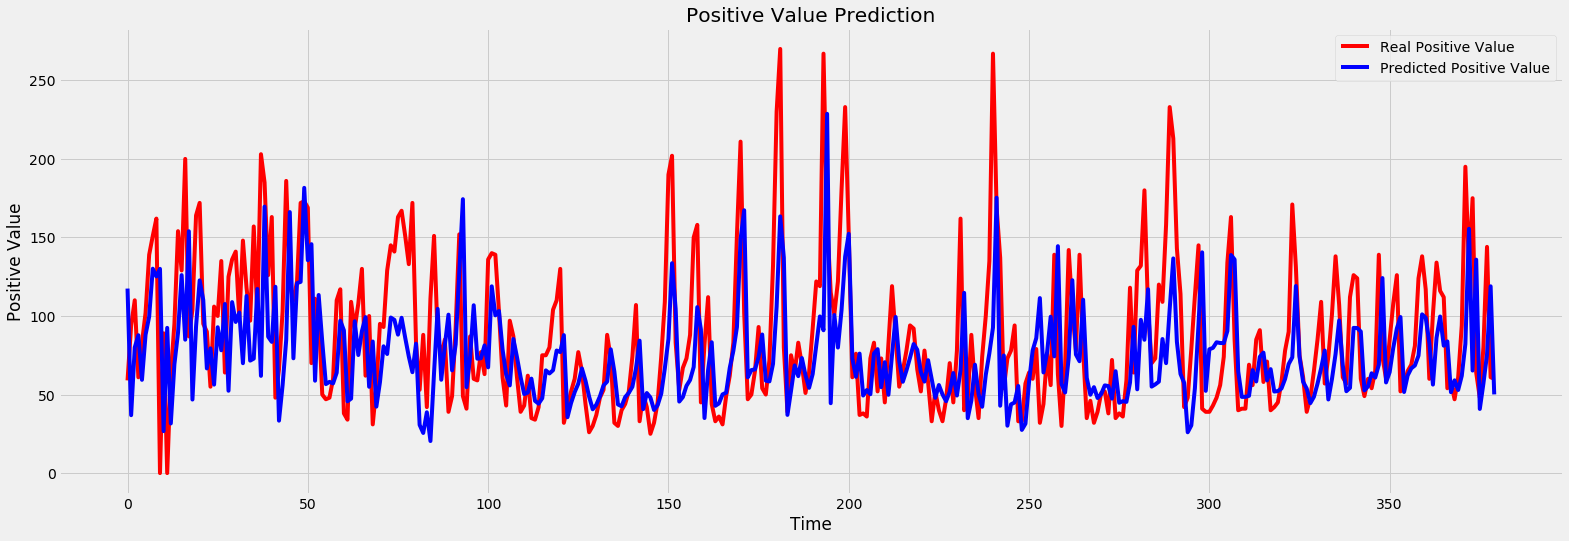

In [82]:
# Visualizing the results for LSTM
plot_predictions(test_set,predicted_positive_value)
# beijing_AQI

In [83]:
# Evaluating our model
return_rmse(test_set,predicted_positive_value)

The root mean squared error is 44.41774478775952.
